# Preprocessing

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import natural language toolkit
import nltk

# Import tokenizer
from nltk.tokenize import RegexpTokenizer

# Import lemmatizer
from nltk.stem import WordNetLemmatizer

# Import regular expression
import re

# Import wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#reading the datafile for Text Preprocessing

df = pd.read_csv('../data/df.csv')
df.head()

,Unnamed: 0,paper,year,month,title,author,code,program
0,73,74,1975,March,Variation Across Household in the Rate of Infl...,['Robert T Michael'],w00074,['Economic Fluctuations and Growth']
1,86,87,1975,May,Exports and Foreign Investment in the Pharmace...,"['Merle Yahr Weiss', 'Robert E Lipsey']",w00087,"['International Trade and Investment', 'Intern..."
2,106,107,1975,October,Social Security and Retirement Decisions,['Michael J Boskin'],w00107,['Public Economics']
3,115,116,1975,November,Notes on the Tax Treatment of Human Capital,['Michael J Boskin'],w00116,['Public Economics']
4,116,117,1980,April,Job Mobility and Earnings Growth,['Ann P Bartel'],w00117,['Labor Studies']


In [3]:
#dropping the column = Unnamed:0
df.drop(columns='Unnamed: 0', axis=1,inplace=True)

In [4]:
#checking the dataframe
df.head()

,paper,year,month,title,author,code,program
0,74,1975,March,Variation Across Household in the Rate of Infl...,['Robert T Michael'],w00074,['Economic Fluctuations and Growth']
1,87,1975,May,Exports and Foreign Investment in the Pharmace...,"['Merle Yahr Weiss', 'Robert E Lipsey']",w00087,"['International Trade and Investment', 'Intern..."
2,107,1975,October,Social Security and Retirement Decisions,['Michael J Boskin'],w00107,['Public Economics']
3,116,1975,November,Notes on the Tax Treatment of Human Capital,['Michael J Boskin'],w00116,['Public Economics']
4,117,1980,April,Job Mobility and Earnings Growth,['Ann P Bartel'],w00117,['Labor Studies']


In [5]:
#instantiate tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [6]:
#tokenizing the title of working papers
df['title'] = df['title'].apply(lambda x: tokenizer.tokenize(x))

In [7]:
#Create stopword list
#add new words to the stopwords
stopwords = set(STOPWORDS)
new_words = ["may","aren", "couldn", "didn", "doesn", "don", "hadn", "hasn", "haven", "isn", "let", 
                  "ll", "mustn", "re", "shan", "shouldn", "ve", "wasn", "weren", "won", "wouldn", "t",
            "within","upon", "greater","effect","new", "the"]
stopwords = stopwords.union(new_words)

In [8]:
#instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
#function to lemmatize the title text
def word_lemmatizer(title):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in title if not i in stopwords])
    return lem_text

In [10]:
#applying the lemmatizer and checking the title column
df['title'] = df['title'].apply(lambda x: word_lemmatizer(x))
df['title'].head()

0            Variation Across Household Rate Inflation
1    Exports Foreign Investment Pharmaceutical Indu...
2                 Social Security Retirement Decisions
3                    Notes Tax Treatment Human Capital
4                         Job Mobility Earnings Growth
Name: title, dtype: object

In [11]:
#joining all titles
title_text = " ".join(text for text in df['title'])

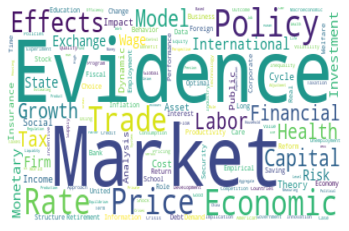

In [12]:
#Create and generate a word cloud image
wordcloud_title = WordCloud(stopwords = stopwords, collocations=False,background_color="white", max_words=150).generate(title_text)

# Display the generated image
plt.imshow(wordcloud_title, interpolation='bilinear',aspect="auto");
plt.axis("off");

In [13]:
#instantiating the count vectorizer
#fitting and transforming the title 

cv = CountVectorizer(max_df=0.8,stop_words=stopwords, max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(df['title'])

In [14]:
#checking the vocabulary after the count vectorizer
list(cv.vocabulary_.keys())[:10]

['variation',
 'across',
 'household',
 'rate',
 'inflation',
 'rate inflation',
 'exports',
 'foreign',
 'investment',
 'pharmaceutical']

             Word  Freq
0        evidence  1938
1          policy  1202
2          market  1156
3           trade   970
4         effects   901
5         capital   876
6           labor   798
7       financial   761
8        economic   759
9          growth   741
10            tax   736
11         health   728
12  international   720
13       exchange   651
14        markets   640
15           risk   602
16       monetary   595
17           rate   542
18     investment   531
19         income   526


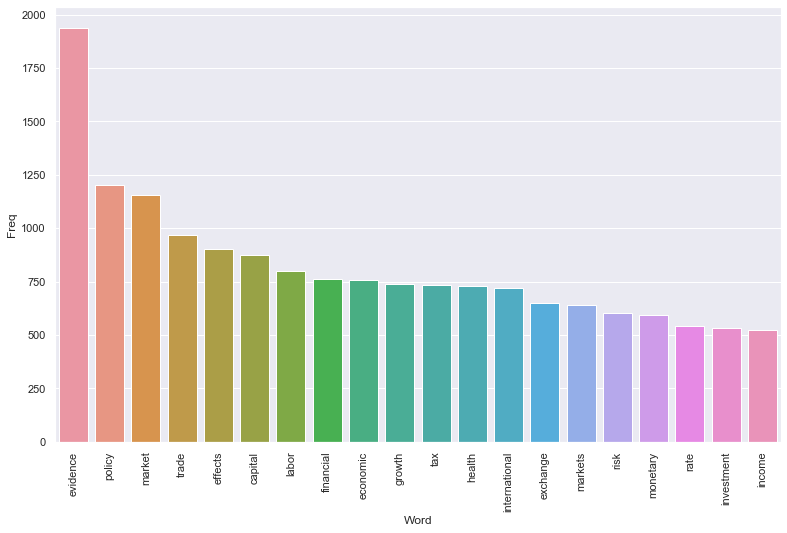

In [15]:
#Most frequently occuring words
def get_top_n_words(text, n=None):
    vec = CountVectorizer(stop_words=stopwords).fit(df['title'])
    bag_of_words = vec.transform(df['title'])
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(df['title'], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
print(top_df)

#Barplot of most freq words

sns.set(rc={'figure.figsize':(13,8)});
g = sns.barplot(x="Word", y="Freq", data=top_df);
g.set_xticklabels(g.get_xticklabels(), rotation=90);

                Bi-gram  Freq
0       monetary policy   349
1         exchange rate   342
2         united states   310
3          labor market   277
4       social security   240
5        exchange rates   181
6      health insurance   180
7       theory evidence   153
8        business cycle   145
9        interest rates   143
10        human capital   142
11             long run   141
12      economic growth   137
13         labor supply   124
14  international trade   120
15      business cycles   118
16        fiscal policy   114
17            long term   113
18         stock market   113
19          health care   101


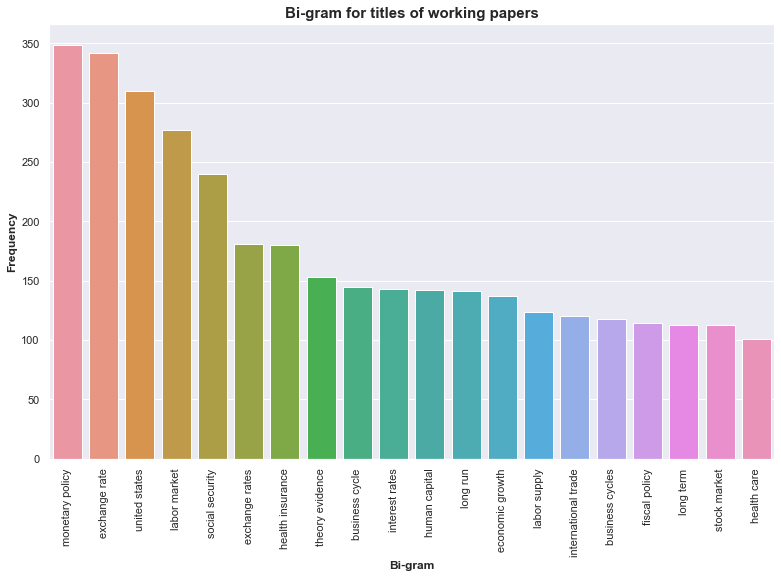

In [16]:
#Most frequently occuring Bi-grams 
def get_top_n2_words(text, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000, stop_words=stopwords).fit(df['title'])
    bag_of_words = vec1.transform(df['title'])
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(df['title'], n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams

sns.set(rc={'figure.figsize':(13,8)});
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df);
h.set_xticklabels(h.get_xticklabels(), rotation=90)
h.set_title("Bi-gram for titles of working papers", weight='bold', fontsize=15);
h.set_xlabel("Bi-gram", weight='bold', fontsize=12);
h.set_ylabel("Frequency", weight='bold', fontsize=12);

                       Tri-gram  Freq
0            real exchange rate    69
1     foreign direct investment    67
2         labor market outcomes    41
3     labor force participation    30
4           real exchange rates    29
5         exchange rate regimes    28
6       optimal monetary policy    22
7       term structure interest    21
8                  world war ii    20
9      structure interest rates    20
10          real interest rates    20
11     exchange rate volatility    20
12         exchange rate regime    20
13       monetary fiscal policy    20
14               tax reform act    20
15    evidence field experiment    20
16  international capital flows    19
17       exchange rate dynamics    19
18               long term care    19
19      foreign exchange market    18


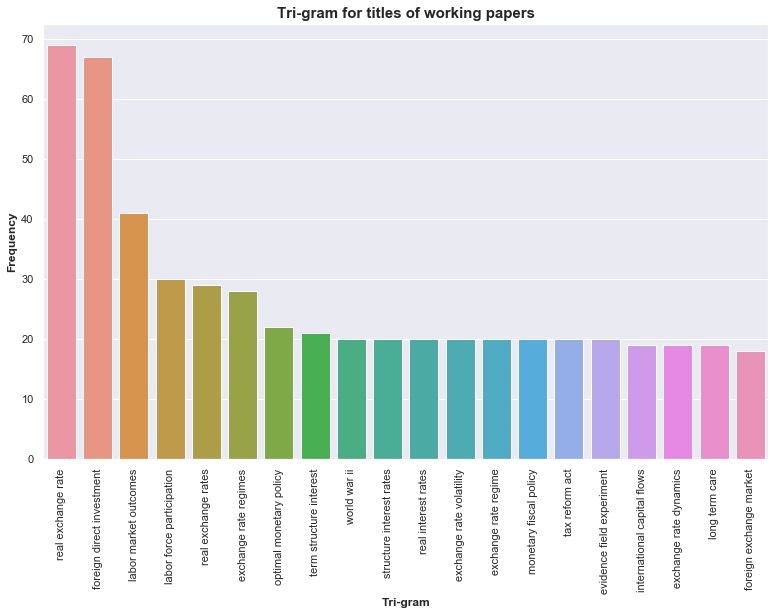

In [17]:
#Most frequently occuring Tri-grams 
def get_top_n3_words(text, n=None):
    vec2 = CountVectorizer(ngram_range=(3,3),  
            max_features=2000, stop_words=stopwords).fit(df['title'])
    bag_of_words = vec2.transform(df['title'])
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec2.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(df['title'], n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams

sns.set(rc={'figure.figsize':(13,8)});
h=sns.barplot(x="Tri-gram", y="Freq", data=top3_df);
h.set_xticklabels(h.get_xticklabels(), rotation=90);
h.set_title("Tri-gram for titles of working papers", weight='bold', fontsize=15);
h.set_xlabel("Tri-gram", weight='bold', fontsize=12);
h.set_ylabel("Frequency", weight='bold', fontsize=12);